## COVID-19 EDA Project

Sources for data are from cityofchicago.org, chicago.gov and from Chicagotribune


https://data.cityofchicago.org/Health-Human-Services/Per-Capita-Income/r6ad-wvtk

https://data.cityofchicago.org/Health-Human-Services/COVID-19-Cases-Tests-and-Deaths-by-ZIP-Code/yhhz-zm2v/data


https://data.cityofchicago.org/Health-Human-Services/COVID-19-Daily-Vaccinations-Administered-in-Chicag/4564-ixr2/data


https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Chicago-Zip-Code-and-Neighborhood-Map/mapn-ahfc


https://www.chicago.gov/content/dam/city/sites/covid/reports/2020-04-24/ChicagoCommunityAreaandZipcodeMap.pdf


https://www.chicagotribune.com/chi-community-areas-htmlstory.html#zip


The goal of the project is to analyze impact of COVID on Chicago Residents depending on socio-economic variables such as education, earning and where they live in Chicago.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import geopandas
%matplotlib inline


## Importing data

income= pd.read_csv ('indicators_in_Chicago_2008_2012.csv')
zipcode= pd.read_csv ('EDA_Project\\Zip_code.csv')
vaccination= pd.read_csv ('Vaccination_Zip.csv')
covidrate = pd.read_excel ('COVID_Rate_Zip_exl.xlsx')
# Importing data

# income= pd.read_csv (r"../input/covid-19-chicago/indicators_in_Chicago_2008_2012.csv")
# zipcode= pd.read_csv (r"../input/covid-19-chicago/Zip_code.csv")
# vaccination= pd.read_csv (r"../input/covid-19-chicago/Vaccination_Zip.csv")
# covidrate = pd.read_csv (r"../input/covid-19/COVID_Rate_Zip_exl.csv")


##converting column to date type

vaccination['Date'] = pd.to_datetime(vaccination['Date'])
covidrate['Week_End']= pd.to_datetime(covidrate['Week_End'])
vaccination['month'] = pd.DatetimeIndex(vaccination['Date']).month
vaccination['year'] = pd.DatetimeIndex(vaccination['Date']).year



###### Data Dict
Zip code (str) - To find where people live and to compare data according to zip code

Community Name (str) - To find community name of where people live and to compare data according to communities

PERCENT HOUSEHOLDS BELOW POVERTY (float) :- to understand poverty level of community
    
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA (float) :- To understand education level of community
    
PER CAPITA INCOME (float) :- to understand income level within Community

Case cumulative weekly (int) :- To understand cases per week per community and to use over all result / zip code
    
Test Cumulative weekly (int) :- To understand level of testing per week and to use over all result per community 
    
Deaths – Cumulative Weekly (int)  To understand level of death per week and to use over all result per community 

Population (int) :- to understand what percent of population from the zip code were affected, got tested, died and were vaccinated
    
Dose cumulative Weekly (int):- to understand vaccination  by zip code.

## Data dictionary


#### Main file namaes

vaccination

covidrate

zipcode

income




###### Variable Names

case_zip = weekly positivity rate

test_zip= weekly testrate

death_zip = weekly death rate 

tcd_zip= test, case, death rate by zip

income_zip = income by community name and zipcode

zip_index = list of zip in order

spdf = super data frame with all needed data

daily_vacs = daily vaccination by zip and date



##### Column name in  Final file

zipcode (Str) - To find where people live and to compare data according to zip code

Community (Str)- To find community name of where people live and to compare data according to communities

PERCENT_HOUSEHOLDS_BELOW_POVERTY (Str) :- to understand poverty level of community
    
Percent_No_HS_Degree_25_years+ (str):- To understand education level of community
    
PER_CAPITA_INCOME (Str) :- to understand income level within Community

Case_Total (cumulative) (str) :- To understand cases per week per community and to use over all result / zip code
    
Total_Test (str) :- To understand level of testing per week and to use over all result per community 
    
Total_Deaths (str)- To understand level of death per week and to use over all result per community 

Population :- to understand what percent of population from the zip code were affected, got tested, died and were vaccinated
    
Total_Dose:- to understand vaccination  by zip code.
covidrate_month = seperated by month and year and zip.



##### Dropping Data

In [3]:
# # Dropping rows from Covidrate
unknown_zip= covidrate.loc[covidrate['ZIP_Code'] == 'Unknown']
covidrate= covidrate.drop(unknown_zip.index) # dropped 94 rows

## Dropping Columns from Covidrate
covidrate_cols_drop = ['Week Number', 'Case Rate - Weekly', 'Case Rate - Cumulative', 'Test Rate - Weekly','Test Rate - Cumulative', 'Percent Tested Positive - Weekly', 'Death Rate - Weekly', 'Death Rate - Cumulative', 'Row ID', 'ZIP Code Location']
covidrate= covidrate.drop(columns=covidrate_cols_drop, inplace=False)


## Dropping rows from vaccination
# print (vaccination.shape[0],'Vac Shape before Drop') ## Shape Before drop
unknown_vaczip= vaccination.loc[vaccination['ZipCode']== 'Unknown']

vaccination = vaccination.drop(unknown_vaczip.index) ## dropped 304 rows

## Dropping columns from vaccination
vac_col_to_drop = ['1st Dose - Daily', '1st Dose - Cumulative', '1st Dose - Percent Population', 'Vaccine Series Completed - Daily', 'Vaccine Series Completed - Cumulative', 'Vaccine Series Completed  - Percent Population', 'Total Doses - Daily - Age 12+', 'Total Doses - Daily - Age 18+', 'Total Doses - Daily - Age 65+', '1st Dose - Daily - Age 12+', '1st Dose - Daily - Age 18+', '1st Dose - Daily - Age 65+', 'Vaccine Series Completed - Daily - Age 12+', 'Vaccine Series Completed - Daily - Age 18+', 'Vaccine Series Completed - Daily - Age 65+', 'Population', 'Row_ID', 'ZIP Code Location']
vaccination = vaccination.drop(columns=vac_col_to_drop, inplace=False)


##Dropping row for Socio-Economics Indicator --- Income education by community

missing_incomedata = income[income.Community_Area_Number.isnull()]
income =income.drop(missing_incomedata.index) ## Dropping empty row
 

In [ ]:
   
# adding column to change column name
income['Community'] = income['Community_Area_Name'].astype(str)
income ['Percent_No_HS_Degree_25_years+'] = income ['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].astype(str)
income['Community'] = income['Community_Area_Name'].astype(str)


##Dropping Columns for Socio-Economics Data

income_col_drop = ['Community_Area_Name','PERCENT AGED UNDER 18 OR OVER 64','PERCENT OF HOUSING CROWDED','PERCENT AGED 16+ UNEMPLOYED','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PERCENT AGED UNDER 18 OR OVER 64']
income = income.drop(columns=income_col_drop, inplace=False)

## converting zipcode column to string from float
zipcode['Zip_Code']= zipcode['Zip_Code'].astype(str)


## merging two files together

## merging income and zipcode file together to get zipcode name to column name

income_zip = pd.merge(income,zipcode,left_on='Community_Area_Number', right_on='Community_Area_Number', how='left')


###### Grouping Data by zipcode to see sum of vaccination, test, cases, and death according to zip code

In [4]:
## Grouping Data by zipcode, 

vaccination_zip= vaccination.groupby(['ZipCode']) ['Total_Doses_Daily'].sum()
tcd_zip= covidrate.groupby (['ZIP_Code'])[['Tests_Weekly','Cases_Weekly','Deaths_Weekly']].sum()
zip_index= tcd_zip.index  ## list of all zipcodes
daily_vacs= vaccination.groupby(['ZipCode', 'Date'])['Total_Doses_Daily'].sum()



#### Merging columns and files to create Final data file with desired variables

In [5]:
## mergining data to create Final file with desired variables
vaccination_community = pd.merge(vaccination_zip,income_zip,left_on='ZipCode', right_on='Zip_Code', how='left')

### creating a super file with all data
tcdzip =tcd_zip.index
tcd_zip['zipcode']= tcdzip.astype(str)

spdf= pd.merge(tcd_zip,vaccination_community ,left_on='zipcode', right_on='Zip_Code', how='left')

spdf['Percent_No_HS_Degree'] = spdf['Percent_No_HS_Degree_25_years+'].astype(float)

In [6]:
## dropping columns and rows in final file
missing_spdf = spdf[spdf.Community.isnull()]
spdf_drop = ['Community_Area_Number','Community_Area_Name', 'Zip_Code', 'Percent_Of_Household_Below_Poverty', 'Percent_No_HS_Degree_25_years+']
spdf = spdf.drop(columns=spdf_drop, inplace=False)

spdf =spdf.drop(missing_spdf.index, inplace= False) ## Dropping empty row

# changing columns name
spdf.rename ({'Tests_Weekly': 'Total_Test','Cases_Weekly': 'Total_Cases', 'Deaths_Weekly' :'Total_Death', 'Total_Doses_Daily' :'Total_Doses' }, axis=1, inplace=True)
## 

In [24]:
spdf.to_csv('SPDF11.csv')

##### The box plot shows that there are some outliers for Per Capita Income, hardship index and percentage of population without HS degree; however, these numbers are true because there are certain communities that are disadvantaged than other communities in Chicago. We wil not be dropping any values.

<AxesSubplot:>

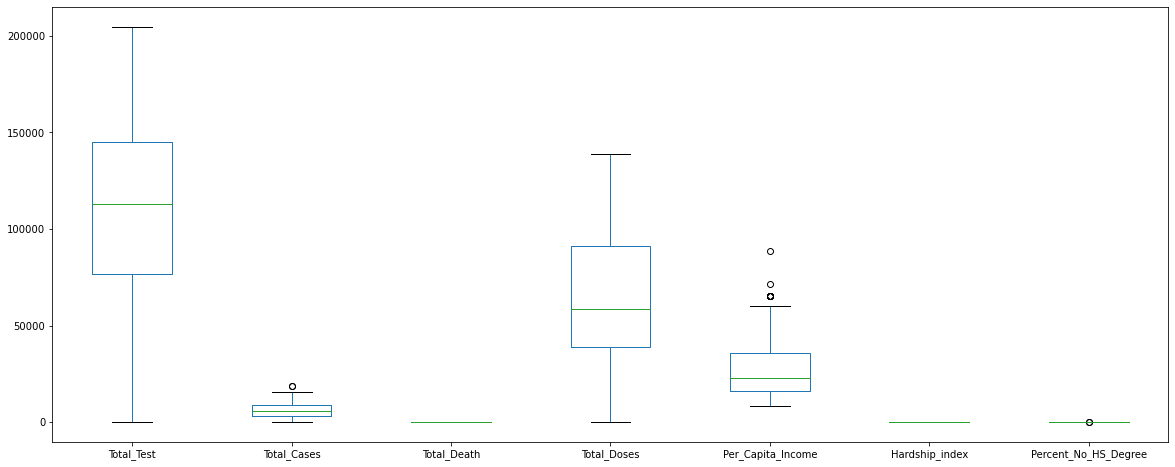

In [7]:
## boxplot
spdf.plot(kind='box', figsize=(20,8))


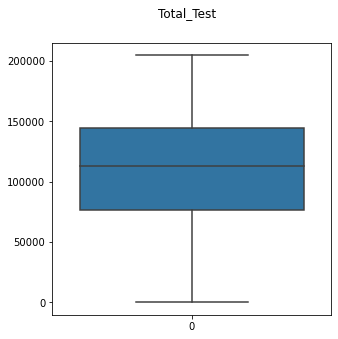

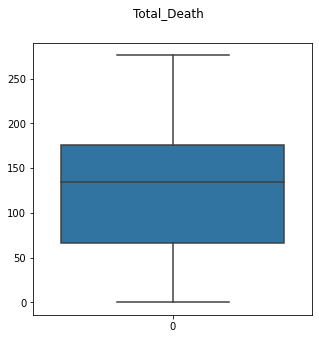

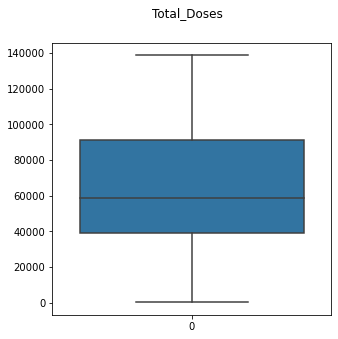

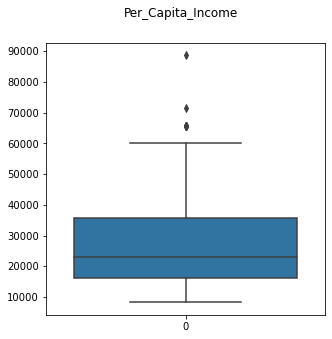

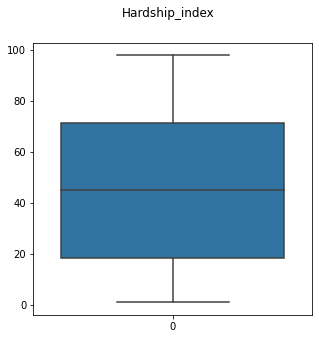

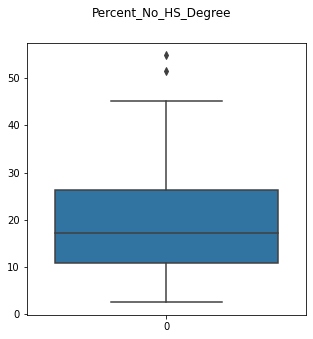

In [8]:
features = ['Total_Test', 'Total_Death', 'Total_Doses',
       'Per_Capita_Income', 'Hardship_index',
       'Percent_No_HS_Degree']
for i in features:
    fig, axes = plt.subplots(sharex=True, figsize=(5,5))
    fig.suptitle(f'{i}')
    sns.boxplot(data = spdf[i], whis=1.5)


In [9]:
## seems as if total cases are high where percapita income is less and population with HighSchool degree less and Hardship is high
spdf[spdf["Total_Cases"]>15000]

,Total_Test,Total_Cases,Total_Death,zipcode,Total_Doses,Per_Capita_Income,Hardship_index,Community,Percent_No_HS_Degree
44,182955.0,18710.0,275,60629,138663.0,16907.0,56.0,West Lawn,33.6
45,182955.0,18710.0,275,60629,138663.0,13231.0,80.0,Chicago Lawn,31.2
59,163036.0,15721.0,259,60639,112202.0,15461.0,70.0,Belmont Cragin,37.3
60,163036.0,15721.0,259,60639,112202.0,15089.0,71.0,Hermosa,41.6


In [10]:
### percapita income is higher in wealthier communities
spdf[spdf["Per_Capita_Income"]>60000]

,Total_Test,Total_Cases,Total_Death,zipcode,Total_Doses,Per_Capita_Income,Hardship_index,Community,Percent_No_HS_Degree
0,54604.0,1479.0,12,60601,23880.0,65526.0,3.0,Loop,3.1
1,4824.0,124.0,3,60602,2762.0,65526.0,3.0,Loop,3.1
2,4785.0,89.0,0,60603,2979.0,65526.0,3.0,Loop,3.1
3,8284.0,116.0,0,60604,1724.0,65526.0,3.0,Loop,3.1
5,16939.0,401.0,3,60606,6237.0,65526.0,3.0,Loop,3.1
12,105975.0,4244.0,34,60610,55716.0,88669.0,1.0,Near North Side,2.5
13,81764.0,2701.0,19,60611,54799.0,65526.0,3.0,Loop,3.1
16,199670.0,6982.0,94,60614,93165.0,71551.0,2.0,Lincoln Park,3.6
76,55896.0,2432.0,6,60654,31593.0,65526.0,3.0,Loop,3.1
79,171072.0,6536.0,49,60657,100404.0,60058.0,5.0,Lake View,2.6


## Heat map and Correlation

It makes sense that test, cases, vaccination and death are positively correlated. As testing increases so does the number of cases for any disease and when positivity case of any diseases increases, death caused by the disease increases and eventually vaccination/cure for the disease is discovered and use of the vaccination increases

It is not as surprising to see that number of total cases, total test and total death are negatively correlated with per-capita income.  As per-capita income decreases test, case, and death due to COVID increases. It seems as if impact of COVID is very different for individuals depending on their socio-economic status. 

From the findings above, it makes sense that total case, total test and total death are positively correlated with hardship index. The hardship index is made up with various factors such as per-capita income, education, household below poverty, number of people living under the same household and more. 

It is surprising to see that there is negative correlation between per-capita income and vaccination. Perhaps, there is high income gap in Chicago or perhaps there might be some other reasons, however, this analysis will not pursuit to identify causes of negative correlation between per-capita income and vaccination.

It is not as suprising to see the inverse relation between per capita income and education (No High School Degree for 25 years  or older). 
It is not suprising to learn there is positive correlation between Education and Hardship Index.

It is suprising to see positive correlation between COVID positive cases, COVID death caeses and education



Text(0.5, 1.0, 'Correlation Heatmap using Socioeconomics index variables and COVID variables')

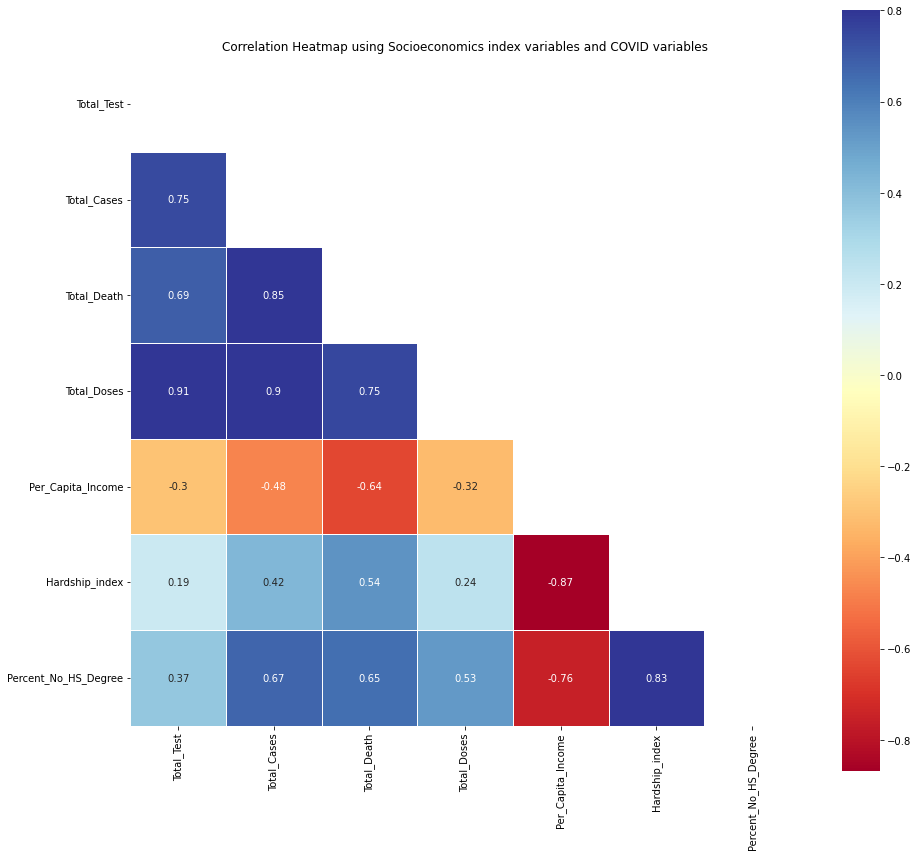

In [11]:
# #Setting up files for correlations and to generate heatmap


##correlation
spdfcorr= spdf.corr()


##creating a heatmap

## creating a mask to only see relationship between few variables

mask= np.triu(np.ones_like(spdfcorr, dtype=bool))

# set the figure size
f, ax = plt.subplots(figsize=(15, 14))

## creating heat map using a mask

sns.heatmap(spdfcorr, vmax=.8, square=True, mask = mask, annot=True, cmap='RdYlBu', linewidths=.9 )
plt.title('Correlation Heatmap using Socioeconomics index variables and COVID variables')



### Creating categories based on Hardship Index and grouping data by Hardship Category

Since the hardship index is made up with various factors such as per-capita income, education, household below poverty, number of people living under the same household and more. Firstly we are ranking communities on the basis on hardship index level and we are categorizing different communities to either category 1, 2, or 3 depending on their hardship index rank. 

As a reference, Category 1 possesses wealthier neighborhoods, as portrayed by the news article below, names of all the 10 richest communities of Chicago from the article are listed in Category 1. Category 3 represents neighborhood such as Englewood and according to a study conducted by University of Chicago Medicine, 54% of household are receiving food in Englewood.  

Category 2 possess communities that are in between Category 1 and 3.


The remaining analysis will be conducted using hardship index or hardship category as comparison for different variables between these three categories.  

https://moneyinc.com/richest-neighborhoods-chicago/

https://www.uchicagomedicine.org/-/media/pdfs/adult-pdfs/community/chna-community-profiles/englewood-community-profile.pdf



In [13]:
## ranking data according to Hardship Index

spdf['Hardship_Rank'] = spdf['Hardship_index'].rank()


## categorizing data according to hardship rank

## cat 1 = hardship index lower than 28, cat 2= between 28 and 56, 3 = hardship index higher than 56

from pandas import Categorical
mid_cat=42
high_cat= 63
low_cat = 21


spdf['Hardship_Cat'] = Categorical(np.where(spdf['Hardship_Rank'] < low_cat, 'Category 1','Category 2'))
spdf['Hardship_Cat'] = Categorical(np.where(spdf['Hardship_Rank'] > low_cat,'Category 2',spdf['Hardship_Cat']))
spdf['Hardship_Cat'] = Categorical(np.where(spdf['Hardship_Rank'] > mid_cat,'Category 3',spdf['Hardship_Cat']))
spdf['Hardship_Cat'] = Categorical(np.where(spdf['Hardship_Rank'] > high_cat,'Category 4',spdf['Hardship_Cat']))

spdf.groupby('Hardship_Cat').sum()


# # # Run this code if you want to see which community names with their category

# group1 = spdf[spdf['Hardship_Cat']=='Low Hardship']
# # group2 = spdf[spdf['Hardship_Cat']==2]
# # group3 = spdf[spdf['Hardship_Cat']==3]

# print (group1[['Community','Hardship_index', 'Hardship_Cat']])
# print (group2[['Community','Hardship_index','Hardship_Cat']])
# print (group3[['Community','Hardship_index','Hardship_Cat']])

# spdf2.sort_values(by='Hardship_Rank', ascending=False)


,Total_Test,Total_Cases,Total_Death,Total_Doses,Per_Capita_Income,Hardship_index,Percent_No_HS_Degree,Hardship_Rank
Hardship_Cat,,,,,,,,
Category 1,1582196.0,61319.0,798,838630.0,1146656.0,131.0,92.5,210.0
Category 2,2714045.0,149834.0,2811,1579778.0,610199.0,680.0,341.6,693.0
Category 3,2656141.0,175685.0,3676,1562840.0,390777.0,1228.0,504.3,1113.0
Category 4,2297837.0,158110.0,3174,1374709.0,279414.0,1794.0,649.6,1554.0


## Pair plot Findings

 Similar to findings above,

•	There seems to be positive correlation between COVID Test and COVID cases.

•	There seems to be positive correlation between COVID case and Death.

•	There seems to be positive correlation between COVID case and COVID Vaccination. 

•	There seems to be negative correlation between per-capita income and Hardship Index




Contrary to my hunch, vaccination number and hardship index are not related. I had assumed, vaccination number would be lower for higher hardship index.

There seems to be high correlation between hardship index and other variables such as Test, COVID Case, Death due to COVID. As the hardship index increases test, case and death number increases

Total vaccine doses does not show correlation with hardship index as vaccination number is very similar across hardship index

There seems to be high correlation between per-capita income and other variable. There is negative correlation between per capita income and variables such as hardship index, test, case, death and vaccination doses.



In [14]:
spdf.columns

Index(['Total_Test', 'Total_Cases', 'Total_Death', 'zipcode', 'Total_Doses',
       'Per_Capita_Income', 'Hardship_index', 'Community',
       'Percent_No_HS_Degree', 'Hardship_Rank', 'Hardship_Cat'],
      dtype='object')

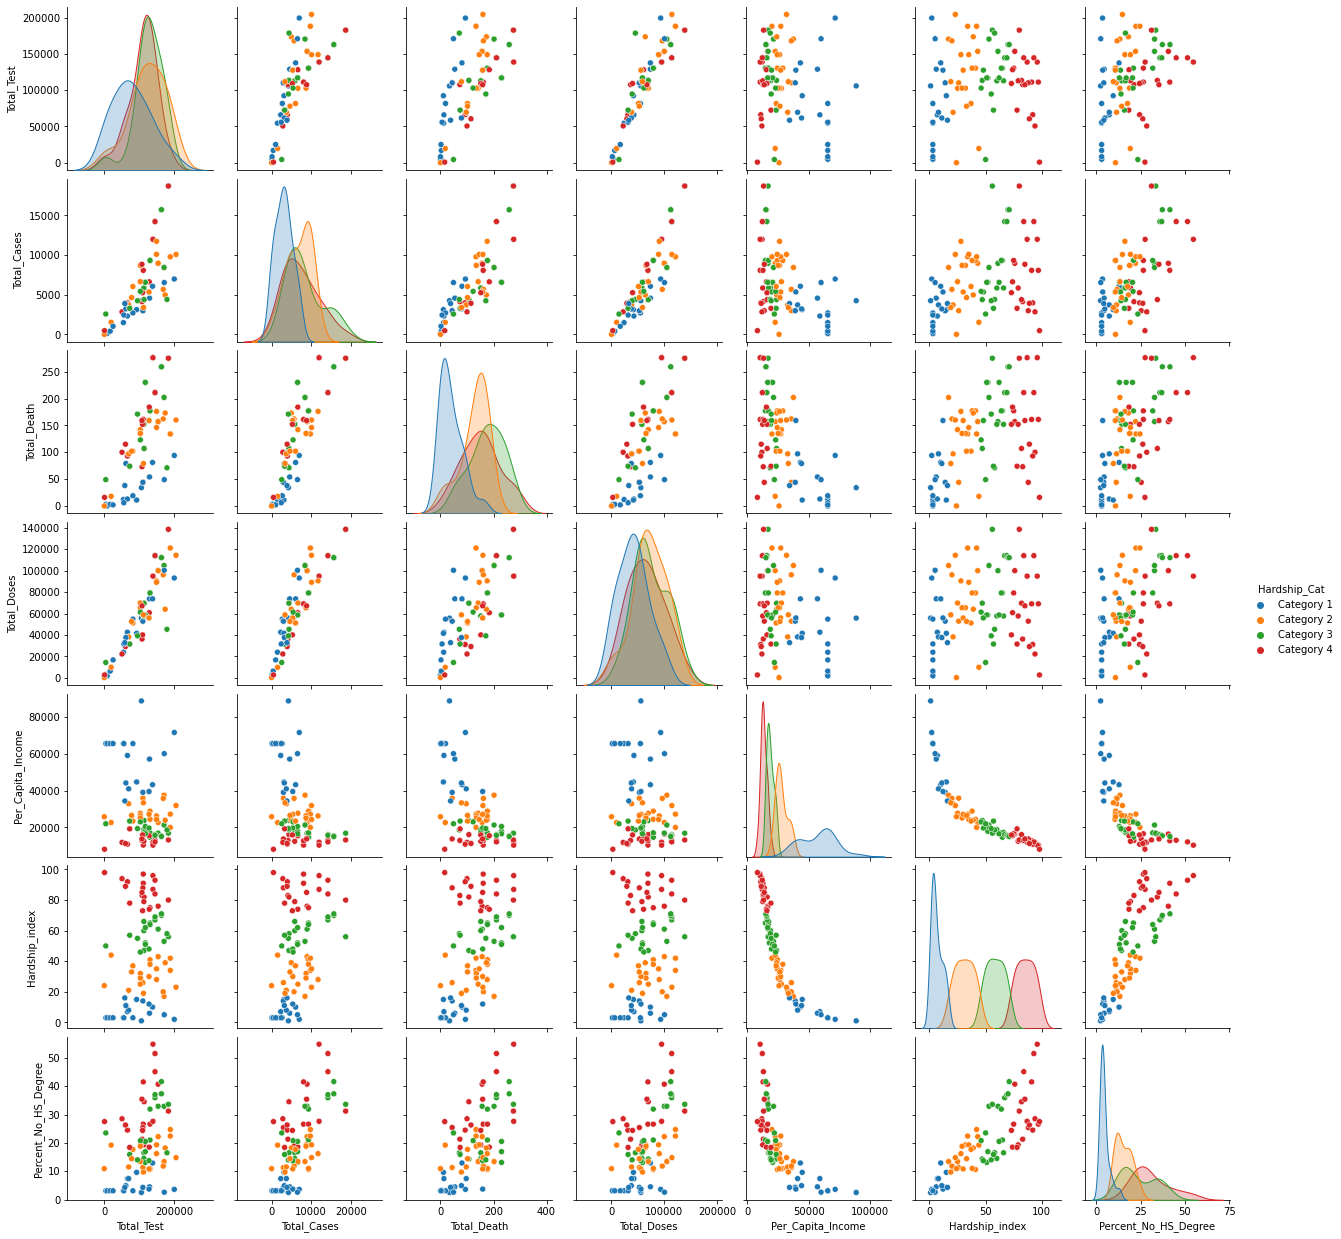

In [15]:
## Seaborn Pair Plot to see relationship between different categories
sns.pairplot(spdf, hue='Hardship_Cat', vars=['Total_Test', 'Total_Cases', 'Total_Death', 'Total_Doses',
       'Per_Capita_Income', 'Hardship_index',
       'Percent_No_HS_Degree']);

## Understanding data after categorizing and after visualizing using pair plot 

Average test is higher for all categories.

Average case is significantly increases between Category 1 and 2, and Category 2 and 3 have similar case rate.  Average case is almost doubles between Category 1 and 2, and Category 3’s case is higher than Category 2. Category 3’s case is more than 40% higher than category 1

Average death is almost double between category 1 to 2 and average death increases slightly between category 3 and 2. However, average death is more than double between category 1 and 3

Average per capita income is more than 50% different between category 1 and 2, and average per capita income differs by more than 40% between category 2 and 3. Average per-capita income of category 1 is 3 times higher than category 3.

In all cases, there are vast differences between three categories and astonishing gap between category 1 and category 3.


#### Interesting finding that came up unintended.
Average vaccination number is higher for category 3 compared to category 1 and 2

Average hardship index for category 1 = 10.4, for category 2 = 44, category 3 = 80


 ##### Visualizing relationship between variables using pair plot after categorizing data, individual relationship will be analyzed using scatter plot

#### COVID Positive Case Scatter Plot  agaist other variables seperated by categories (Income, Hardship, Education)

The scatter plot shows that the testing and cases increased for all three categories, however, there is significant difference in COVID cases between category 1 and 3 and communities within category 3 have more COVID case than communities in category 1.


Text(0.5, 1.0, 'COVID Data by Hardship Category')

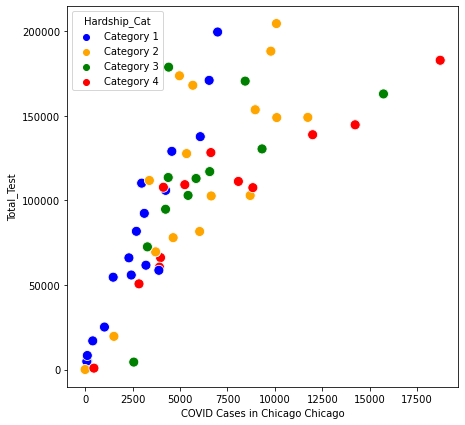

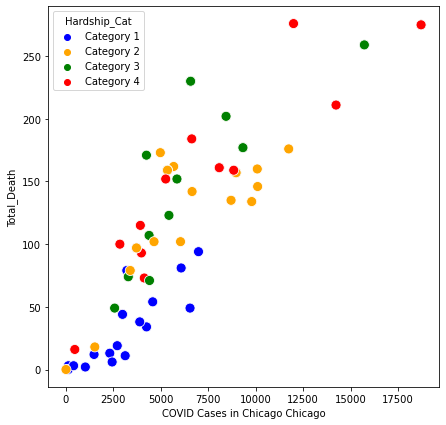

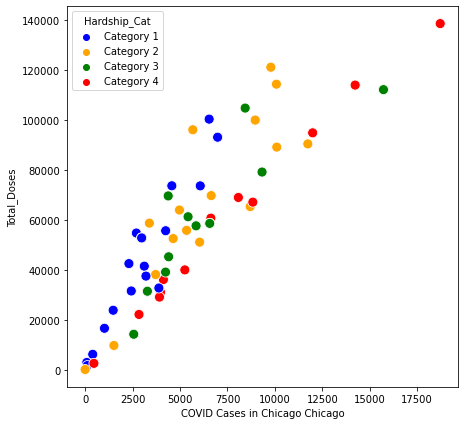

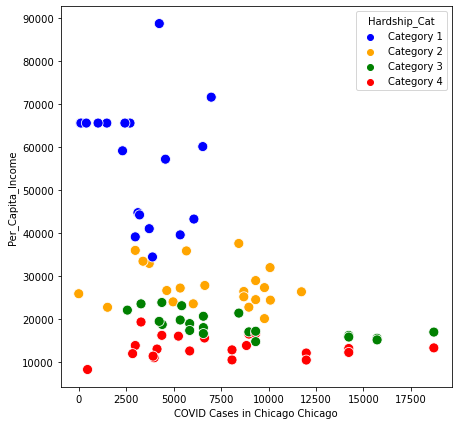

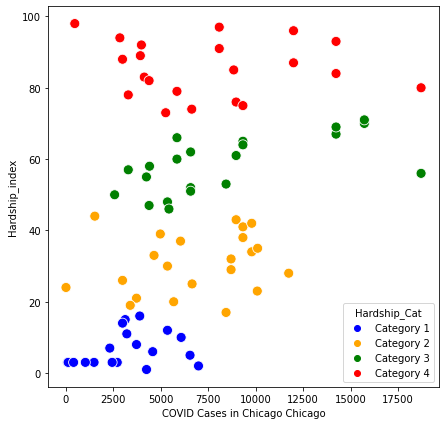

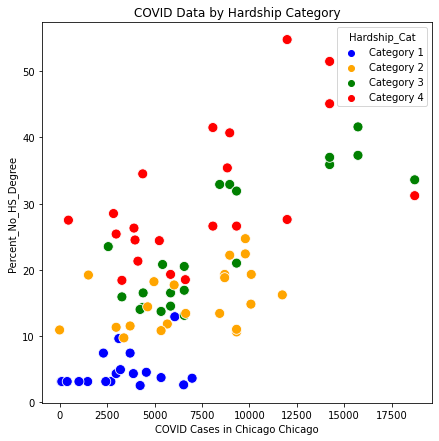

In [16]:

for i in features:
    fig, ax = plt.subplots(figsize=(7,7))
    ax=sns.scatterplot(y=i, x ='Total_Cases', hue='Hardship_Cat',
                      palette= {'Category 1':"blue", 'Category 2': "orange", 'Category 3':"green", 'Category 4':"red"},
                      data=spdf, legend='full', s=100)
    ax.set_ylabel (i)
    ax.set_xlabel ('COVID Cases in Chicago Chicago')
ax.set_title ('COVID Data by Hardship Category')

#### COVID positive case and COVID related death Scatter Plot.
Here we can see that both positive cases and death are significantly higher for communities in category 3 compared to communities in category 1 and 2. Difference in death number for communities in category 1 and 3 is very significant.


##  Relationship between COVID and Per Capita Income and relationship between COVID and education

Although the Hardship Index takes Per Capita Income and education (percentage of community members- 25 years or older, who do not possesses high school degree) into consideration and the  data is already categorized using hardship index, plots below will examine relationship between COVID and Per Capita Income and relationship between COVID and education. For our purpose education level is referred to as percentage of community members- 25 years or older, who do not possesses high school degree

## COVID and Per Capita Income

This section will examin the relationship between COVID and Per Capita Income

#### COVID Cases and Death  Per Capita Income


We can see that btoh COVID Case and Death number increases significantly as income decrease. We can see communities in category 2 and 3 have higher number of cases and death compared to communities that are in category 1 . 


In [17]:
### Categorizing by percapita income

Twenty_K= 20000
Fourty_K= 40000
Sixty_K = 60000


## Cat 1 = per capita income more than 60K, Cat2 = per capita income between 40-60K, cat 3 = per capita income between20-40K, cat 4 = per capita income less than 20K

spdf['Income_Cat'] = Categorical(np.where(spdf['Per_Capita_Income'] <= Twenty_K, 'Per-capita Income less than $20K',1))
spdf['Income_Cat'] = Categorical(np.where(spdf['Per_Capita_Income'] > Twenty_K,'Per-capita Income between $20K- $40K',spdf['Income_Cat']))
spdf['Income_Cat'] = Categorical(np.where(spdf['Per_Capita_Income'] > Fourty_K, 'Per-capita Income between $40K -$60K',spdf['Income_Cat']))
spdf['Income_Cat'] = Categorical(np.where(spdf['Per_Capita_Income'] > Sixty_K,'Per-capita Income more than $60K',spdf['Income_Cat']))

# spdf





Text(0.5, 1.0, 'COVID Data by Income Category')

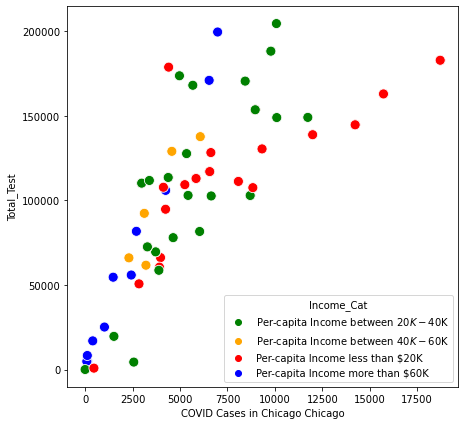

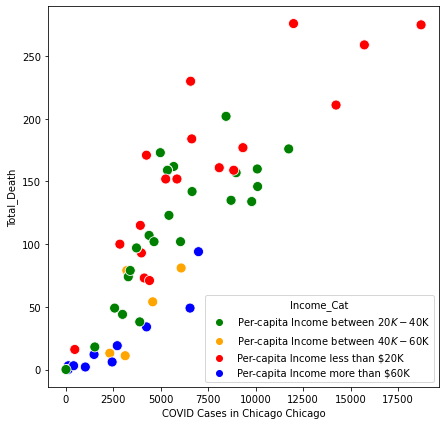

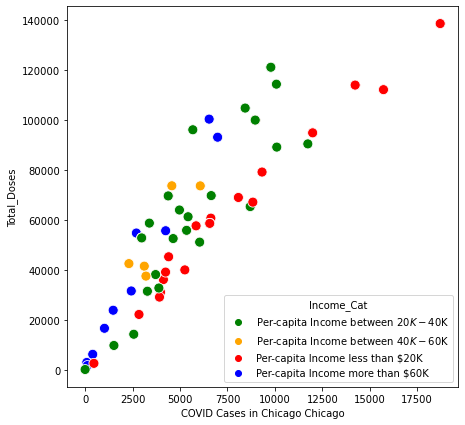

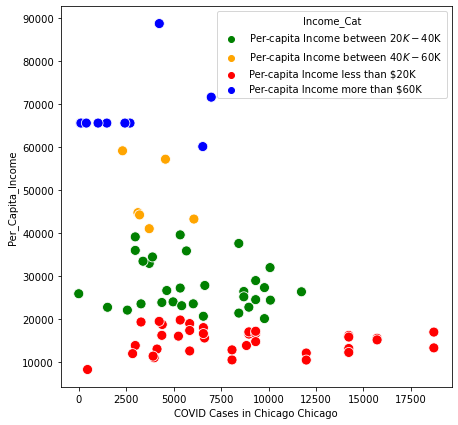

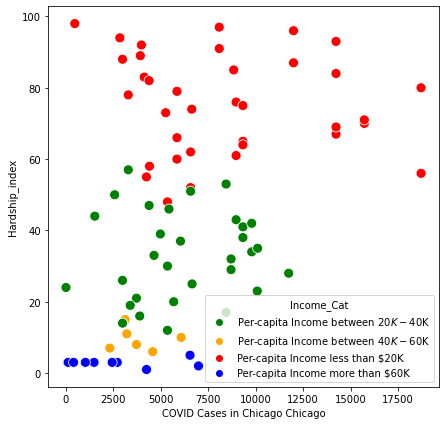

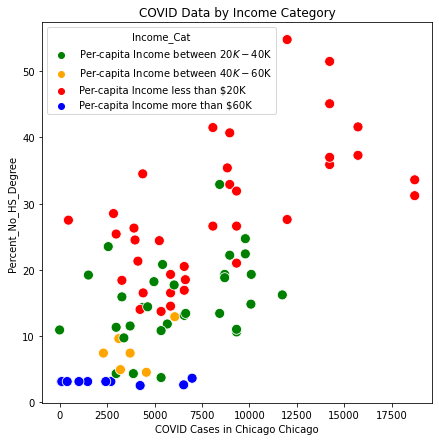

In [18]:
for i in features:
    fig, ax = plt.subplots(figsize=(7,7))
    ax=sns.scatterplot(y=i, x ='Total_Cases', hue='Income_Cat',
                      palette={'Per-capita Income more than $60K':"blue", 'Per-capita Income between $40K -$60K': "orange", 'Per-capita Income between $20K- $40K':"green", 'Per-capita Income less than $20K':"red"},
                      data=spdf, legend='full',s=100)
    ax.set_ylabel (i)
    ax.set_xlabel ('COVID Cases in Chicago Chicago')
ax.set_title ('COVID Data by Income Category')

## Education and COVID

It is very surprising to learn that education (percentage of community members- 25 years or older, who do not possesses high school degree) and COVID cases and COVID related death are highly correlated. 
For communities where high school dropout percentage is higher, COVID cases and death are significantly higher compared with communities where high school dropout rate is low.  

We can also see the astonishing difference in education level between communities that are in category 1 and 3.


In [19]:

## ranking data according to % No HS Degree

spdf['No_HS_Degree_Rank'] = spdf['Percent_No_HS_Degree'].rank()


spdf.sort_values(by='No_HS_Degree_Rank', ascending=False)[:30]

# ## categorizing data according to % NO HS Degree

# ## cat 1 = Less than 10% without HS Degree, cat 2= 20% population without HS Degree , Cat 3 = 30% population without HS Degree , Cat 4 = more than 40% population without HS Degree

Ten_percent_or_less= 10
Twenty_percent_Or_Less= 20
Thirty_percent_Or_Less =30




spdf['No_HS_Cat'] = Categorical(np.where(spdf['Percent_No_HS_Degree'] <= Ten_percent_or_less, "Less than 10% population without HS Degree","Up to 20% population without HS Degree"))
spdf['No_HS_Cat'] = Categorical(np.where(spdf['Percent_No_HS_Degree'] > Ten_percent_or_less,"Up to 20% population without HS Degree",spdf['No_HS_Cat']))
spdf['No_HS_Cat'] = Categorical(np.where(spdf['Percent_No_HS_Degree'] > Twenty_percent_Or_Less,"Up to 30% population without HS Degree",spdf['No_HS_Cat']))
spdf['No_HS_Cat'] = Categorical((np.where(spdf['Percent_No_HS_Degree'] > Thirty_percent_Or_Less,"More than 30% population without HS Degree",spdf['No_HS_Cat'])))





# # # Run this code if you want to see which community names with their category

# nohsgroup1 = spdf[spdf['No_HS_Cat']==1]

# print (nohsgroup1[['Community','Hardship_index', 'Hardship_Cat','No_HS_Cat']])


Text(0.5, 1.0, 'COVID Data by Education Category')

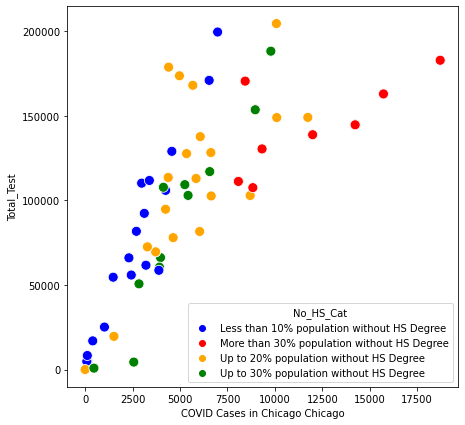

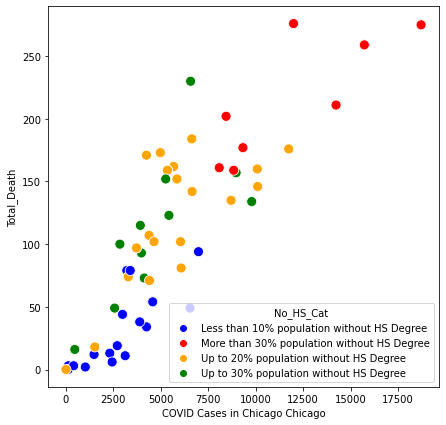

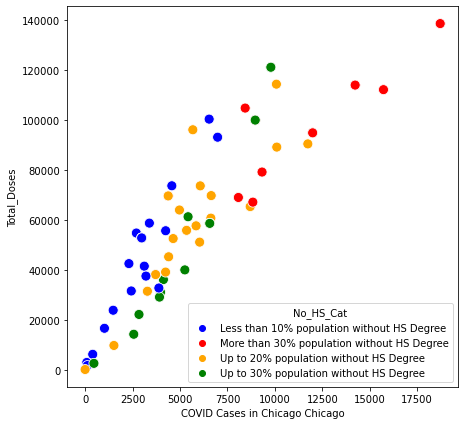

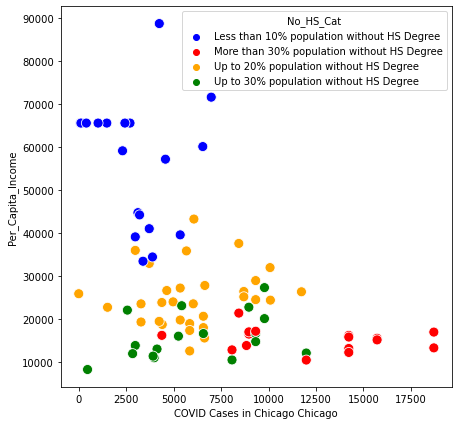

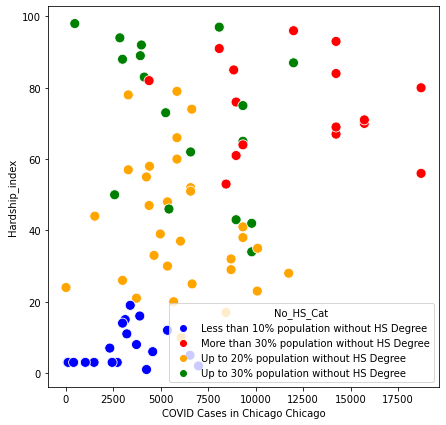

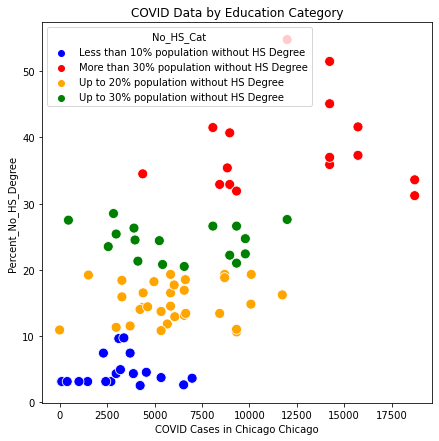

In [20]:
for i in features:
    fig, ax = plt.subplots(figsize=(7,7))
    ax=sns.scatterplot(y=i, x ='Total_Cases', hue='No_HS_Cat',
                    palette={"Less than 10% population without HS Degree":"blue", "Up to 20% population without HS Degree": "orange", "Up to 30% population without HS Degree":"green", "More than 30% population without HS Degree":"red"},
                    data=spdf, legend='full', s=100)
    ax.set_ylabel (i)
    ax.set_xlabel ('COVID Cases in Chicago Chicago')
ax.set_title ('COVID Data by Education Category')


### Relationship between Vaccination and Per Capita Income and Vaccination and Education.

Although the data shows there is correlation between Vaccination and per capita income and between vaccination and education level	. It is relieving to learn that both per capita and education level does not play major role in terms of increase in vaccination. It seems that regardless of Per Capita Income and Education level vaccination number is increasing.


Text(0.5, 0, 'COVID Cases in Chicago Chicago')

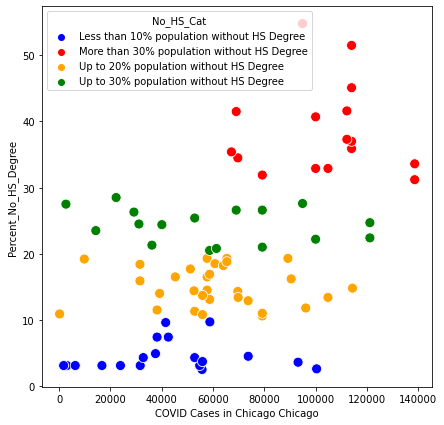

In [21]:
fig, ax = plt.subplots(figsize=(7,7))
ax=sns.scatterplot(x="Total_Doses", y ='Percent_No_HS_Degree', hue='No_HS_Cat',
                   palette={"Less than 10% population without HS Degree":"blue", "Up to 20% population without HS Degree": "orange", "Up to 30% population without HS Degree":"green", "More than 30% population without HS Degree":"red"},
                   data=spdf, legend='full', s=100)
ax.set_ylabel (i)
ax.set_xlabel ('COVID Cases in Chicago Chicago')

Text(0.5, 1.0, 'COVID Vaccination and High School Degree')

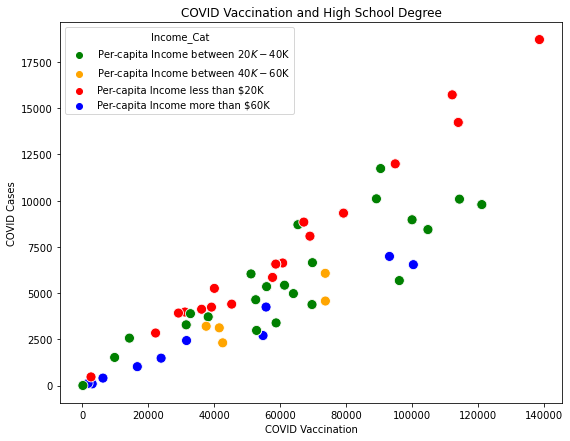

In [22]:
## Scatter plot for Education and COVID Vaccination

fig, ax = plt.subplots(figsize=(9,7))

ax=sns.scatterplot(x='Total_Doses', y ='Total_Cases', hue='Income_Cat',
                  palette= {'Per-capita Income more than $60K':"blue", 'Per-capita Income between $40K -$60K': "orange", 'Per-capita Income between $20K- $40K':"green", 'Per-capita Income less than $20K':"red"},
                  data=spdf, legend='full', s=100)
ax.set_xlabel ('COVID Vaccination')
ax.set_ylabel ('COVID Cases')
ax.set_title ('COVID Vaccination and High School Degree')


# Summary

There are a lot of EDA Insights above that will allow us to understand socioeconomic level and impact of COVID within different communities of Chicago. 
My Initial theory was that community with higher per capita income have higher education level and COVID transmission/cases and COVID related death are lower for wealthier communities and vaccination number in these wealthy communities are higher comparatively.
Most of my initial theory is true, wealthier communities have higher education level, hardship index for these communities are much lower, wealthier communities have less COVID transmission/cases and less COVID related deaths compared communities who are not as wealthy. The stark difference in impact of COVID between wealthier communities and poorer communities is clearly visible. However, there was no true relationship between vaccination and socioeconomic level, regardless of per capita income or education, vaccination number has increases across all communities in Chicago.




### Interesting finding

Text(0.5, 0, 'COVID Cases in Chicago Chicago')

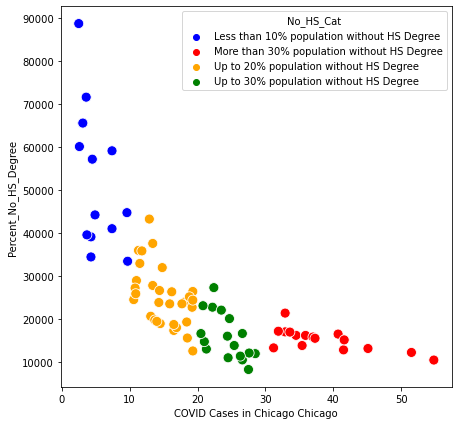

In [23]:
fig, ax = plt.subplots(figsize=(7,7))
ax=sns.scatterplot(y="Per_Capita_Income", x ='Percent_No_HS_Degree', hue='No_HS_Cat',
                   palette={"Less than 10% population without HS Degree":"blue", "Up to 20% population without HS Degree": "orange", "Up to 30% population without HS Degree":"green", "More than 30% population without HS Degree":"red"},
                   data=spdf, legend='full', s=100)
ax.set_ylabel (i)
ax.set_xlabel ('COVID Cases in Chicago Chicago')